# Analysis of data

We analyze data from surveys (depersonalised information).

We utilize several techniques of statistical analysis (frequency analysis), supervised and non supervised analysis: some of those methods are LDA and data vis for LDA https://pypi.org/project/pyLDAvis/, or BERT topic modeling.

In [1]:

# what is the data to load?
import pandas as pd
import math
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
#import folium
#import branca.colormap as cm
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from collections import Counter
from nltk.probability import FreqDist
from gensim.models import LdaModel
import nltk
import os
import string
import numpy as np
import copy
import pandas as pd
import pickle


In [4]:

# Read the data
reviews = pd.read_csv('marchdata_relational_emb_clean_2023.csv', encoding='latin-1')

# Remove missing values
reviews = reviews.dropna()

reviews.head()

,date,"Did you come to any of the awareness practice sessions (morning meditation, afternoon open sessions)? If so, what was helpful/meaningful about these for you?",How did you benefit/learn from the Resiliency Circles (RC)? What was challenging? 8 responses,How did you benefit/learn from the daily buddy interactions? What was challenging? 8 responses,How did you benefit/learn from the Open Spaces? What was challenging about these? 8 responses,What is the key takeaway for you from this residency? 8 responses,Which other practices did you participate in (or did you lead) in the Hub?,"What was your experience with the space of the Hub, both during and outside the practices? How did it impact the balance between individual and collective times? 16 responses",Any comments or feedback (what we can improve or add) you wish to share with us.
6,4/6/2023 16:58:51,"Meditation sometimes yes, afternoon not becaus...","I learned many things, among others e.g. that ...",It was great to know that there is this struct...,I learned the languages of several participant...,?? need more time to think about that.,- Collective massage session (Tova and I came ...,it was too many people together living. but it...,It was part of relational embodiment residency.
7,4/7/2023 16:58:51,I did morning meditation in the first week. I ...,The RCs felt like an unconditionally compassio...,"This was great for processing, getting perspec...",I felt that these were an integral part of the...,There's so much potential for richness in our ...,"Theatre, resonance singing, harmonium. All wer...",There was no room for being in silence. That w...,More prÃ©sence of the facilitator. More time s...


# Data cleaning

In [14]:
contractions = []
def text_preprocessing(text):
    
    # Convert words to lower case
    text = text.lower()
    
    # Expand contractions
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)
        
    # Format words and remove unwanted characters
    #text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    #text = re.sub(r'\<a href', ' ', text)
    #text = re.sub(r'&amp;', '', text) 
    #text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    #text = re.sub(r'<br />', ' ', text)
    #text = re.sub(r'\'', ' ', text) 

    # Tokenize each word
    text = nltk.WordPunctTokenizer().tokenize(text)

    # Lemmatize each word
    text = [nltk.stem.WordNetLemmatizer().lemmatize(token, pos='v') for token in text if len(token)>1]
    
    
    return text

In [ ]:
def to_string(text):
    # Convert list to string
    text = ' '.join(map(str, text))

    return text


print(reviews.iloc[:, 1])
# Create a list of review by applying text_preprocessing function
reviews['col1'] = list(map(text_preprocessing, reviews.iloc[:, 1])) # analyse the first column

# Return to string with to_string function
reviews['col1'] = list(map(to_string, reviews['col1']))

# Frequency of words analysis 

In [18]:
print(reviews.columns)

Index(['date',
       ' Did you come to any of the awareness practice sessions (morning meditation, afternoon open sessions)? If so, what was helpful/meaningful about these for you?',
       'How did you benefit/learn from the Resiliency Circles (RC)? What was challenging? 8 responses',
       'How did you benefit/learn from the daily buddy interactions? What was challenging? 8 responses',
       'How did you benefit/learn from the Open Spaces? What was challenging about these? 8 responses',
       'What is the key takeaway for you from this residency? 8 responses',
       'Which other practices did you participate in (or did you lead) in the Hub?',
       'What was your experience with the space of the Hub, both during and outside the practices? How did it impact the balance between individual and collective times? 16 responses',
       'Any comments or feedback (what we can improve or add) you wish to share with us.'],
      dtype='object')


In [ ]:
# rename first columns to make it easier 

reviews = reviews.rename(columns={' Did you come to any of the awareness practice sessions (morning meditation, afternoon open sessions)? If so, what was helpful/meaningful about these for you?': 'col1'})

reviews = reviews.rename(columns={'How did you benefit/learn from the Resiliency Circles (RC)? What was challenging? 8 responses': 'col2'})

reviews.head()


In [24]:
# concatenate the values in the 'col1' and 'col2' columns and split them into a list of words
words = ' '.join(reviews['col1'] + ' ' + reviews['col2']).split()

# print the resulting list of words
print(words)

['Meditation', 'sometimes', 'yes,', 'afternoon', 'not', 'because', 'I', 'was', 'on', 'the', 'evening', 'cooking', 'team', '(unfortunate', 'planning', 'which', "I'd", 'suggest', 'should', 'be', 'avoided', 'in', 'the', 'future).', 'I', 'learned', 'many', 'things,', 'among', 'others', 'e.g.', 'that', 'sharing', 'circles', 'are', 'a', 'powerful', 'format', 'for', 'me', 'to', 'be', 'able', 'to', 'share', 'things,', 'being', 'listened', 'to', 'and', 'truly', 'listen', 'to', 'others.', 'I', 'found', 'it', 'challenging', 'to', 'sense', 'the', 'strong', 'disconnect', 'of', 'the', 'facilitation', 'team', 'from', 'the', 'residents/participants', 'by', 'only', 'being', 'in', 'the', 'facilitation', 'role', 'in', 'the', 'RC', 'as', 'well', 'as', 'not', 'really', 'being', 'part', 'of', 'the', 'residency', 'but', 'rather', 'coming', 'an', 'going', 'in', 'and', 'out', 'of', 'the', 'house.', 'I', 'did', 'morning', 'meditation', 'in', 'the', 'first', 'week.', 'I', 'felt', 'like', 'this', 'helped', 'with'

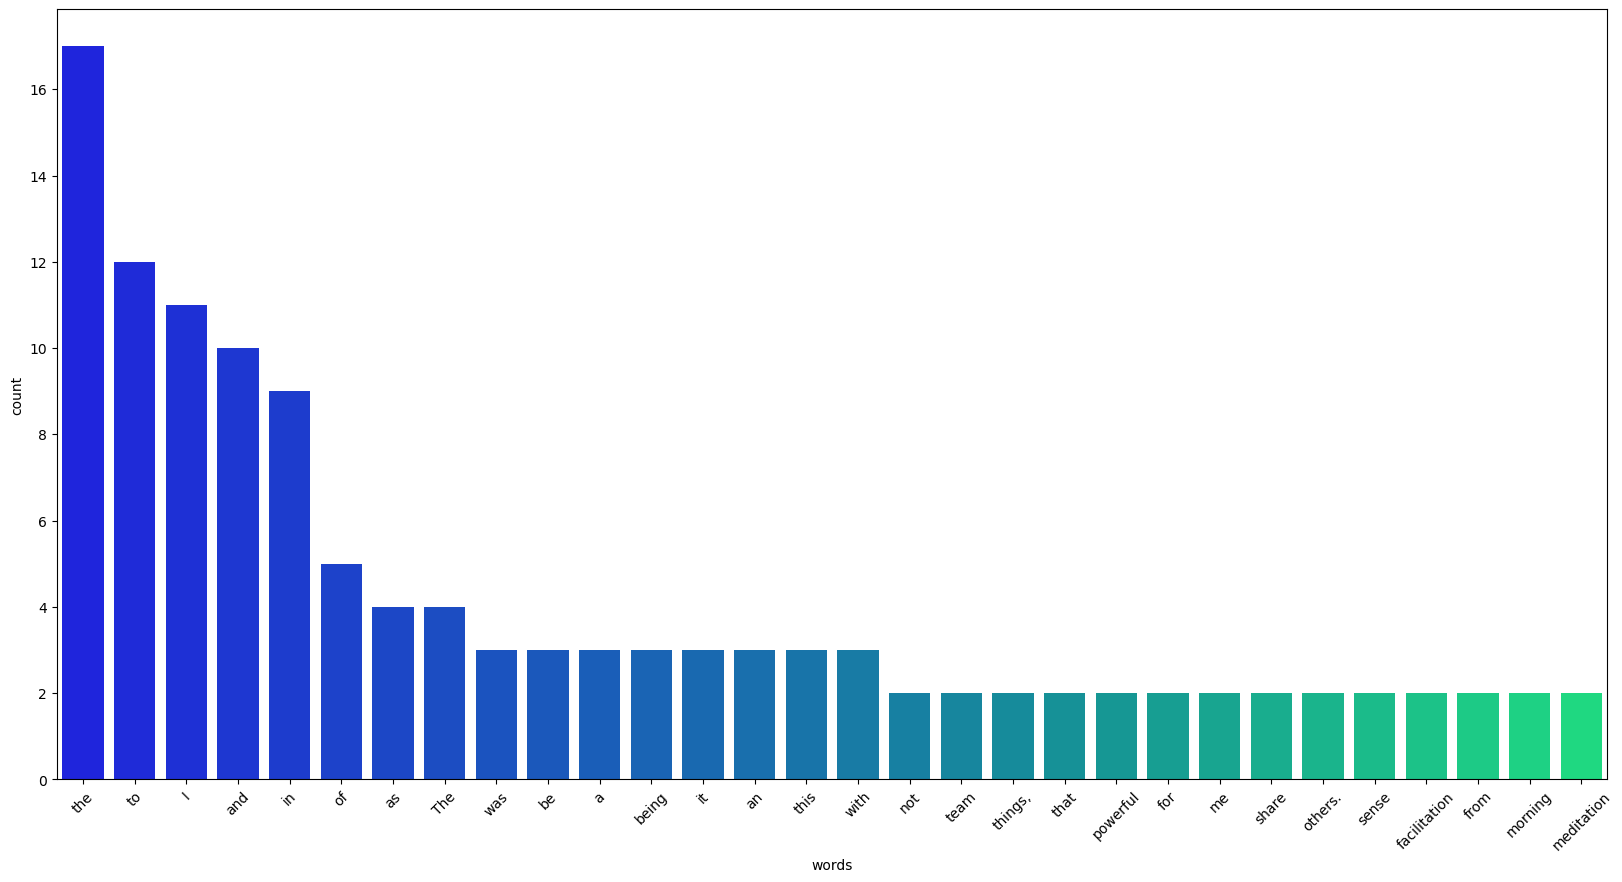

In [27]:
# Import Counter 
from collections import Counter
import seaborn as sns

# Count and find the 30 most frequent
Counter = Counter(words)
most_frequent = Counter.most_common(30)

# Bar plot of frequent words
fig = plt.figure(1, figsize = (20,10))
_ = pd.DataFrame(most_frequent, columns=("words","count"))
sns.barplot(x = 'words', y = 'count', data = _, palette = 'winter')
plt.xticks(rotation=45);

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tupikina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tupikina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['afternoon', 'evening', 'cooking', 'team', '(unfortunate', 'planning', "I'd", 'suggest', 'avoided', 'future).', 'learned', 'many', 'things,', 'among', 'others', 'sharing', 'circles', 'powerful', 'format', 'able', 'share', 'things,', 'listened', 'truly', 'listen', 'others.', 'found', 'challenging', 'sense', 'strong', 'disconnect', 'facilitation', 'team', 'residents/participants', 'facilitation', 'role', 'RC', 'well', 'really', 'part', 'residency', 'rather', 'coming', 'going', 'house.', 'morning', 'meditation', 'first', 'week.', 'felt', 'like', 'helped', 'grounding', 'creating', 'shared', 'sense', 'rhythm', 'others.', 'second', 'week', 'make', 'morning', 'meditation', 'prioritising', 'sleep!', 'ð\x9f\x98\x8a', 'RCs', 'felt', 'like', 'unconditionally', 'compassionate', 'space', 'share', 'experiences', 'explore', 'relational', 'dynamics', 'real', 'time.', 'learnt', 'powerful', 'space', 'enable', 'us', 'tune', 'zoom', 'infinitely', 'complex', 'fractal', 'nature', 'relational', 'experiences

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 [Text(0, 0, 'team'),
  Text(1, 0, 'things,'),
  Text(2, 0, 'powerful'),
  Text(3, 0, 'share'),
  Text(4, 0, 'others.'),
  Text(5, 0, 'sense'),
  Text(6, 0, 'facilitation'),
  Text(7, 0, 'morning'),
  Text(8, 0, 'meditation'),
  Text(9, 0, 'felt'),
  Text(10, 0, 'like'),
  Text(11, 0, 'helped'),
  Text(12, 0, 'space'),
  Text(13, 0, 'relational'),
  Text(14, 0, 'conceptual'),
  Text(15, 0, 'afternoon'),
  Text(16, 0, 'evening'),
  Text(17, 0, 'cooking'),
  Text(18, 0, '(unfortunate'),
  Text(19, 0, 'planning'),
  Text(20, 0, "I'd"),
  Text(21, 0, 'suggest'),
  Text(22, 0, 'avoided'),
  Text(23, 0, 'future).'),
  Text(24, 0, 'learned'),
  Text(25, 0, 'many'),
  Text(26, 0, 'among'),
  Text(27, 0, 'others'),
  Text(28, 0, 'sharing'),
  Text(29, 0, 'circles'),
  Text(30, 0, 'format'),
  Text(31, 0, 'able')

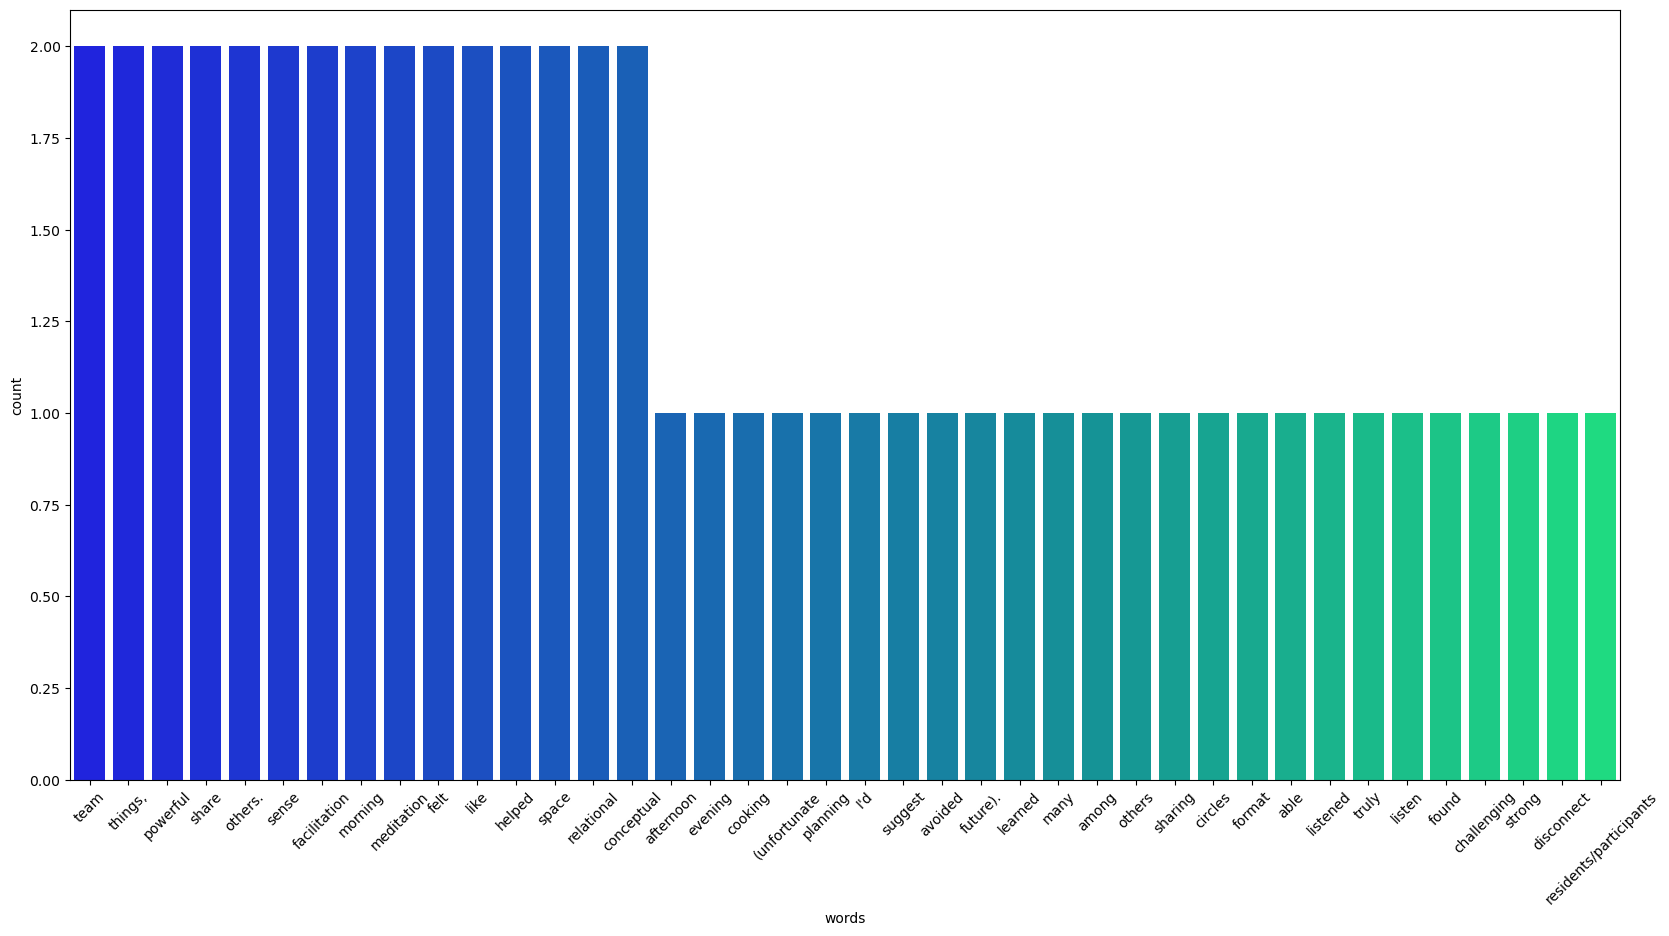

In [85]:

from collections import Counter

import nltk
nltk.download('stopwords')  # download stopwords if you haven't already
from nltk.corpus import stopwords

# add stopwords

# Load the list of stopwords
nltk.download('stopwords')


# remove stop words from the list
stop_words = set(stopwords.words('english'))
# add to stop words
additional_stop_words = ['The', 'I', 'yes,', "sometimes", "Meditation", "e.g."] #"I'd"
stop_words.update(additional_stop_words)

words_without_stopwords = [word for word in words if word not in stop_words]

# print the resulting list of words
print(words_without_stopwords)



# Count and find the 30 most frequent
Counter = Counter(words_without_stopwords)
most_frequent = Counter.most_common(40)


# Bar plot of frequent words
fig = plt.figure(1, figsize = (20,10))
_ = pd.DataFrame(most_frequent, columns=("words","count"))
sns.barplot(x = 'words', y = 'count', data = _, palette = 'winter')
plt.xticks(rotation=45)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tupikina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tupikina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['Meditation', 'afternoon', 'evening', 'cooking', 'team', '(unfortunate', 'planning', "I'd", 'suggest', 'avoided', 'future).', 'learned', 'many', 'things,', 'among', 'others', 'sharing', 'circles', 'powerful', 'format', 'able', 'share', 'things,', 'listened', 'truly', 'listen', 'others.', 'found', 'challenging', 'sense', 'strong', 'disconnect', 'facilitation', 'team', 'residents/participants', 'facilitation', 'role', 'RC', 'well', 'really', 'part', 'residency', 'rather', 'coming', 'going', 'house.', 'It', 'great', 'know', 'structure', 'set', 'place', 'made', 'possible', 'theory', 'could', 'always', 'go', 'buddy', 'felt', 'need', 'sharing', 'something.', 'In', 'practice', 'ended', 'sharing', 'connecting', 'people', 'still', 'highly', 'appreciated', 'buddy', 'relationship,', 'maybe', 'also', 'find', 'often', 'place.', 'learned', 'languages', 'several', 'participants', 'residency', 'found', 'extremely', 'enriching.', 'found', 'challenging', 'conversation', 'open', 'sessions', 'could', 'lo

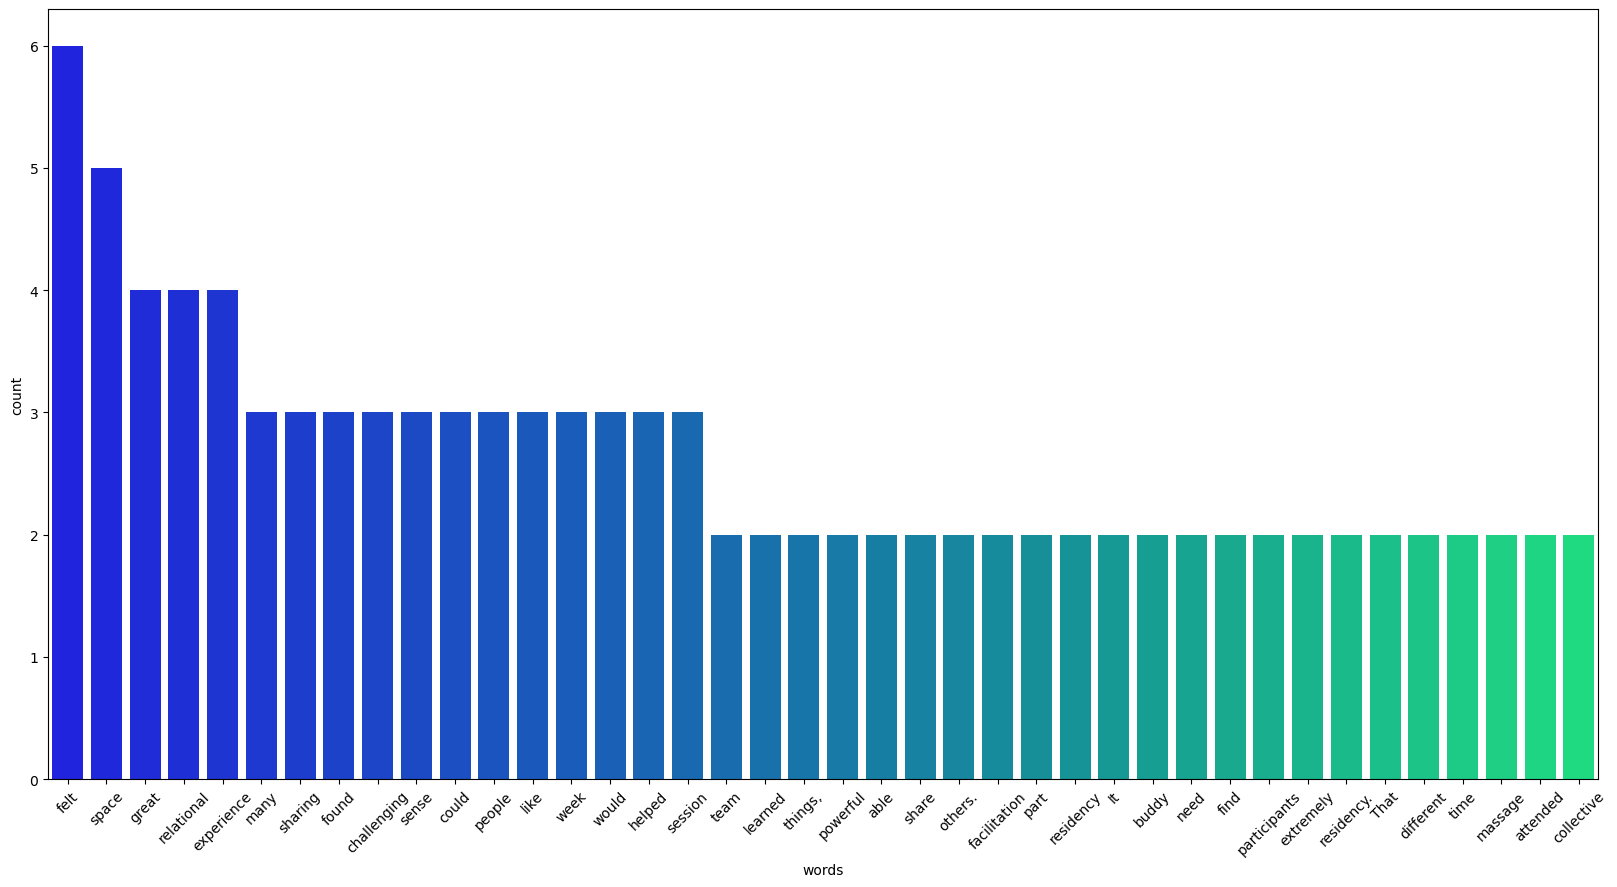

In [89]:

# Load the list of stopwords
nltk.download('stopwords')


# remove stop words from the list
stop_words = set(stopwords.words('english'))
# add to stop words
additional_stop_words = ['The', 'I', 'yes,', "sometimes", "-", "e.g."] #"I'd"
stop_words.update(additional_stop_words)

words_without_stopwords = [word for word in words if word not in stop_words]


freq_words(words_without_stopwords)

# Analyze space-related words

In our analysis we distinguish reflections related to the hub itself and practices which we organise in the hub.

In [86]:


reviews = reviews.rename(columns={"How did you benefit/learn from the daily buddy interactions? What was challenging? 8 responses": 'col3'})

reviews = reviews.rename(columns={"How did you benefit/learn from the Open Spaces? What was challenging about these? 8 responses": 'col4'})

reviews = reviews.rename(columns={"What is the key takeaway for you from this residency? 8 responses": 'col5'})
                                  
reviews = reviews.rename(columns={"Which other practices did you participate in (or did you lead) in the Hub?": "col6"})                               

reviews = reviews.rename(columns={'What was your experience with the space of the Hub, both during and outside the practices? How did it impact the balance between individual and collective times? 16 responses': 'col7'})
reviews.head(5)


,date,col1,col2,col3,col4,col5,col6,col7,Any comments or feedback (what we can improve or add) you wish to share with us.
6,4/6/2023 16:58:51,"Meditation sometimes yes, afternoon not becaus...","I learned many things, among others e.g. that ...",It was great to know that there is this struct...,I learned the languages of several participant...,?? need more time to think about that.,- Collective massage session (Tova and I came ...,it was too many people together living. but it...,It was part of relational embodiment residency.
7,4/7/2023 16:58:51,I did morning meditation in the first week. I ...,The RCs felt like an unconditionally compassio...,"This was great for processing, getting perspec...",I felt that these were an integral part of the...,There's so much potential for richness in our ...,"Theatre, resonance singing, harmonium. All wer...",There was no room for being in silence. That w...,More prÃ©sence of the facilitator. More time s...


In [87]:
words = ' '.join(reviews['col1'] + ' ' + reviews['col2'] + ' '+reviews['col3'] + ' ' + reviews['col4'] + ' ' + reviews['col5'] + ' '+ reviews['col6'] +' '+ reviews['col7'] ).split()

# print the resulting list of words
print(words)

['Meditation', 'sometimes', 'yes,', 'afternoon', 'not', 'because', 'I', 'was', 'on', 'the', 'evening', 'cooking', 'team', '(unfortunate', 'planning', 'which', "I'd", 'suggest', 'should', 'be', 'avoided', 'in', 'the', 'future).', 'I', 'learned', 'many', 'things,', 'among', 'others', 'e.g.', 'that', 'sharing', 'circles', 'are', 'a', 'powerful', 'format', 'for', 'me', 'to', 'be', 'able', 'to', 'share', 'things,', 'being', 'listened', 'to', 'and', 'truly', 'listen', 'to', 'others.', 'I', 'found', 'it', 'challenging', 'to', 'sense', 'the', 'strong', 'disconnect', 'of', 'the', 'facilitation', 'team', 'from', 'the', 'residents/participants', 'by', 'only', 'being', 'in', 'the', 'facilitation', 'role', 'in', 'the', 'RC', 'as', 'well', 'as', 'not', 'really', 'being', 'part', 'of', 'the', 'residency', 'but', 'rather', 'coming', 'an', 'going', 'in', 'and', 'out', 'of', 'the', 'house.', 'It', 'was', 'great', 'to', 'know', 'that', 'there', 'is', 'this', 'structure', 'set', 'in', 'place', 'which', 'm

In [45]:
# concatenate the values in the 'col1' and 'col2' columns and split them into a list of words
wordsspace = ' '.join(reviews['col7']).split()

# print the resulting list of words
print(wordsspace)

['it', 'was', 'too', 'many', 'people', 'together', 'living.', 'but', 'it', 'was', 'ok.', 'There', 'was', 'no', 'room', 'for', 'being', 'in', 'silence.', 'That', 'would', 'have', 'been', 'great', 'and', 'important.', 'Otherwise', 'I', 'felt', 'the', 'houses', 'and', 'garden', 'offered', 'a', 'lot', 'of', 'space', 'for', 'very', 'different', 'needs.']


In [57]:

from collections import Counter

import nltk
from nltk.corpus import stopwords

# add stopwords

def freq_words(words):
    from collections import Counter
    # Load the list of stopwords
    nltk.download('stopwords')


    # remove stop words from the list
    stop_words = set(stopwords.words('english'))
    # add to stop words
    additional_stop_words = ['The', 'I', 'yes,', "but", 'There', 'lot', "Otherwise"] #"I'd"
    stop_words.update(additional_stop_words)

    words_without_stopwords = [word for word in words if word not in stop_words]

    # print the resulting list of words
    print(words_without_stopwords)

    # Count and find the 30 most frequent
    Counter = Counter(words_without_stopwords)
    most_frequent = Counter.most_common(40)
    
    print(most_frequent)

    # Bar plot of frequent words
    fig = plt.figure(1, figsize = (20,10))
    _ = pd.DataFrame(most_frequent, columns=("words","count"))
    sns.barplot(x = 'words', y = 'count', data = _, palette = 'winter')
    plt.xticks(rotation=45)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tupikina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['many', 'people', 'together', 'living.', 'ok.', 'room', 'silence.', 'That', 'would', 'great', 'important.', 'felt', 'houses', 'garden', 'offered', 'space', 'different', 'needs.']
[('many', 1), ('people', 1), ('together', 1), ('living.', 1), ('ok.', 1), ('room', 1), ('silence.', 1), ('That', 1), ('would', 1), ('great', 1), ('important.', 1), ('felt', 1), ('houses', 1), ('garden', 1), ('offered', 1), ('space', 1), ('different', 1), ('needs.', 1)]


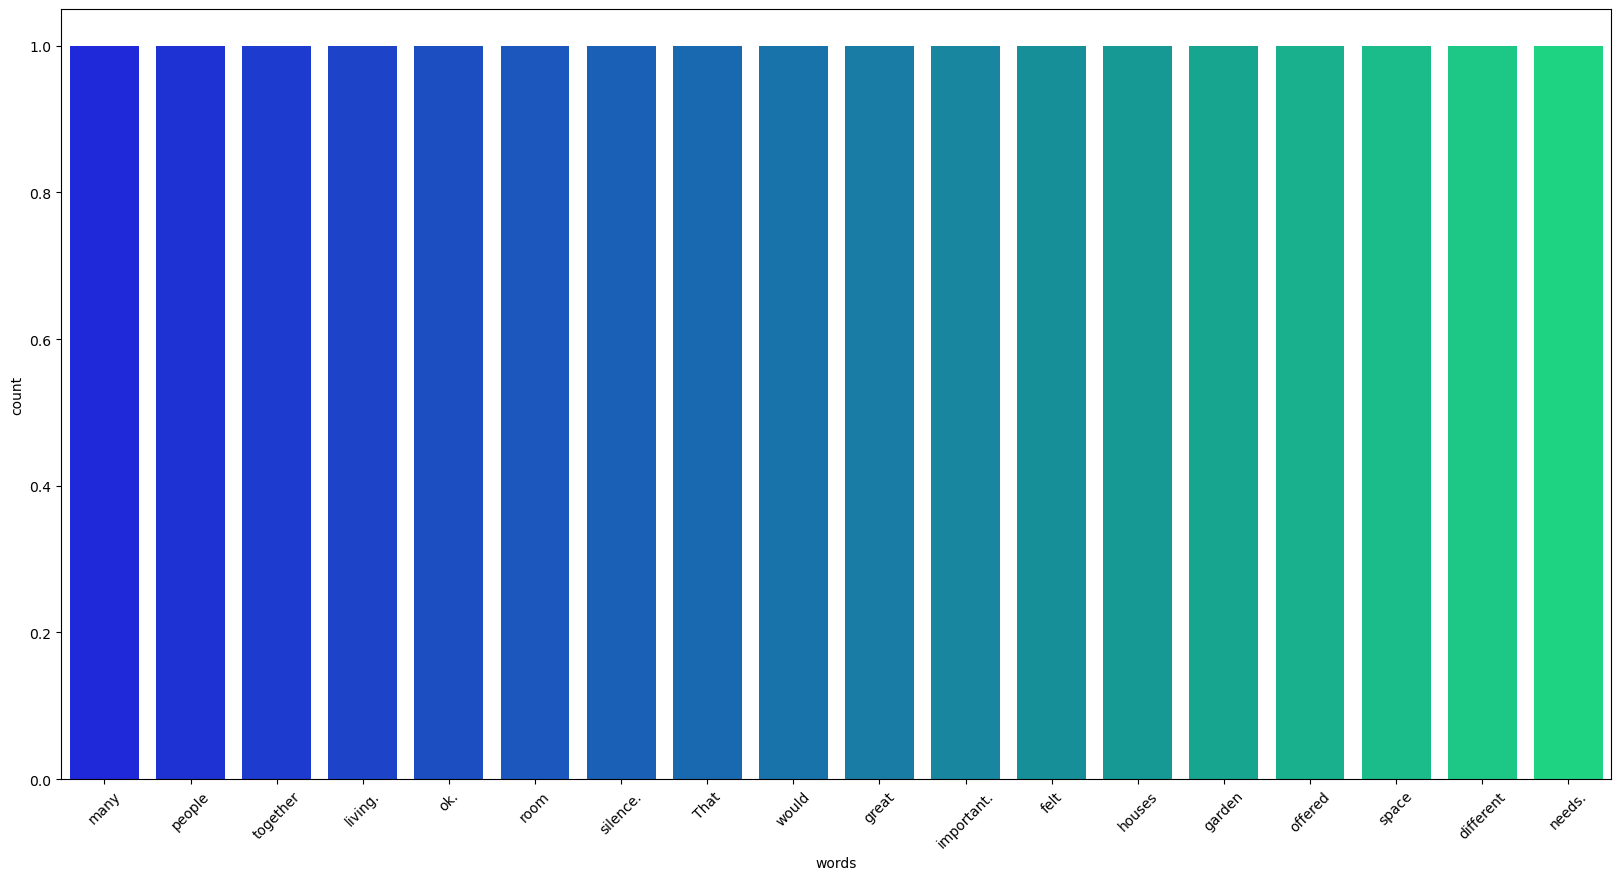

In [58]:
freq_words(wordsspace)

# Word cloud 

Since we had often "words-pronouncement" during our practices, it could be good to see which words were mostly "overrepresented"  in the feedback.

As well as which words were the least used?
#### least popular and most popular words

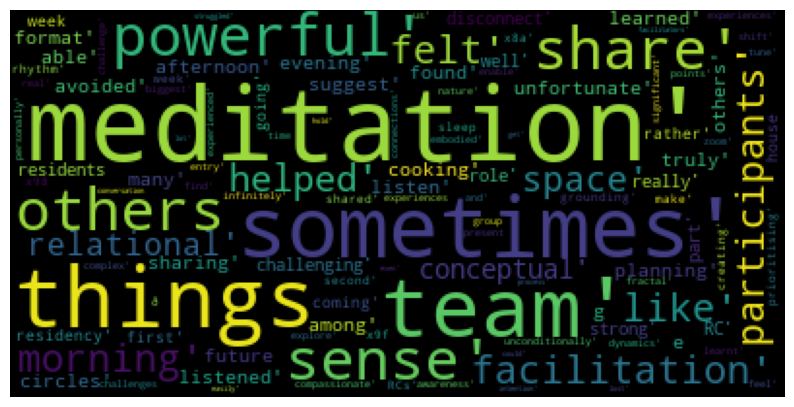

In [84]:

from wordcloud import WordCloud




# Read the whole text.
#text = open(path.join(d, 'bergerac_spreadsheet.txt')).read()

# remove stop words from the list
stop_words = set(stopwords.words('english'))
# add to stop words
additional_stop_words = ['The', 'I', 'yes,'] #"I'd"
stop_words.update(additional_stop_words)


words_without_stopwords = [word for word in words if word not in stop_words]


# Generate a word cloud image
wordcloud = WordCloud().generate(str(words_without_stopwords)) # we need to convert it to string first

'''
# Generate the word cloud
wordcloud = WordCloud(background_color="white",
                      max_words= 200,
                      contour_width = 8,
                      contour_color = "steelblue",
                      collocations=False).generate(words)
'''

# Visualize the word cloud
fig = plt.figure(1, figsize = (10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [41]:
!pip install wordcloud

     -------------------------------------- 153.1/153.1 kB 1.5 MB/s eta 0:00:00


# Topic modeling 

Bag-of-Words

In order to use text as an input to machine learning algorithms, we need to present it in a numerical format. Bag-of-words is a vector space model and represents the occurrence of words in the document. In other words, bag-of-words converts each review into a collection of word counts without giving importance to the order or meaning.

We will first create our dictionary using corpora.Dictionary of Gensim and then use dictionary.doc2bow to create bag-of words.


In [68]:
# create a list of strings
doc_list = ["This is the first document", "This is the second document", "This is the third document"]

print(type(doc_list))

print(type(words))

<class 'list'>
<class 'list'>


In [70]:
import gensim 

from gensim.corpora.dictionary import Dictionary

print(words)

# create a dictionary from the list of strings
dictionary = Dictionary([doc.split() for doc in words])

# convert the list of strings to a list of lists of tokens
corpus = [dictionary.doc2bow(doc.split()) for doc in words]

# Create Dictionary
#id2word = gensim.corpora.Dictionary(corpus)#reviews['col1'])

# Create Corpus: Term Document Frequency
#corpus = [id2word.doc2bow(text) for text in reviews['col1']]

['Meditation', 'sometimes', 'yes,', 'afternoon', 'not', 'because', 'I', 'was', 'on', 'the', 'evening', 'cooking', 'team', '(unfortunate', 'planning', 'which', "I'd", 'suggest', 'should', 'be', 'avoided', 'in', 'the', 'future).', 'I', 'learned', 'many', 'things,', 'among', 'others', 'e.g.', 'that', 'sharing', 'circles', 'are', 'a', 'powerful', 'format', 'for', 'me', 'to', 'be', 'able', 'to', 'share', 'things,', 'being', 'listened', 'to', 'and', 'truly', 'listen', 'to', 'others.', 'I', 'found', 'it', 'challenging', 'to', 'sense', 'the', 'strong', 'disconnect', 'of', 'the', 'facilitation', 'team', 'from', 'the', 'residents/participants', 'by', 'only', 'being', 'in', 'the', 'facilitation', 'role', 'in', 'the', 'RC', 'as', 'well', 'as', 'not', 'really', 'being', 'part', 'of', 'the', 'residency', 'but', 'rather', 'coming', 'an', 'going', 'in', 'and', 'out', 'of', 'the', 'house.', 'I', 'did', 'morning', 'meditation', 'in', 'the', 'first', 'week.', 'I', 'felt', 'like', 'this', 'helped', 'with'

In [71]:
print(corpus)

[[(0, 1)], [(1, 1)], [(2, 1)], [(3, 1)], [(4, 1)], [(5, 1)], [(6, 1)], [(7, 1)], [(8, 1)], [(9, 1)], [(10, 1)], [(11, 1)], [(12, 1)], [(13, 1)], [(14, 1)], [(15, 1)], [(16, 1)], [(17, 1)], [(18, 1)], [(19, 1)], [(20, 1)], [(21, 1)], [(9, 1)], [(22, 1)], [(6, 1)], [(23, 1)], [(24, 1)], [(25, 1)], [(26, 1)], [(27, 1)], [(28, 1)], [(29, 1)], [(30, 1)], [(31, 1)], [(32, 1)], [(33, 1)], [(34, 1)], [(35, 1)], [(36, 1)], [(37, 1)], [(38, 1)], [(19, 1)], [(39, 1)], [(38, 1)], [(40, 1)], [(25, 1)], [(41, 1)], [(42, 1)], [(38, 1)], [(43, 1)], [(44, 1)], [(45, 1)], [(38, 1)], [(46, 1)], [(6, 1)], [(47, 1)], [(48, 1)], [(49, 1)], [(38, 1)], [(50, 1)], [(9, 1)], [(51, 1)], [(52, 1)], [(53, 1)], [(9, 1)], [(54, 1)], [(12, 1)], [(55, 1)], [(9, 1)], [(56, 1)], [(57, 1)], [(58, 1)], [(41, 1)], [(21, 1)], [(9, 1)], [(54, 1)], [(59, 1)], [(21, 1)], [(9, 1)], [(60, 1)], [(61, 1)], [(62, 1)], [(61, 1)], [(4, 1)], [(63, 1)], [(41, 1)], [(64, 1)], [(53, 1)], [(9, 1)], [(65, 1)], [(66, 1)], [(67, 1)], [(68, 1

# Finding number of topics in reviews



Deciding on the number of topics for the topic modeling can be difficult. 
Since we have initial knowledge of the context, determining the number of topics for modeling wouldn't be too difficult but we may loose some context.



C:\Users\tupikina\Anaconda3\lib\site-packages\gensim\topic_coherence\direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in double_scalars
  m_lr_i = np.log(numerator / denominator)
C:\Users\tupikina\Anaconda3\lib\site-packages\gensim\topic_coherence\indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in double_scalars
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))


<AxesSubplot:xlabel='number_of_topics'>

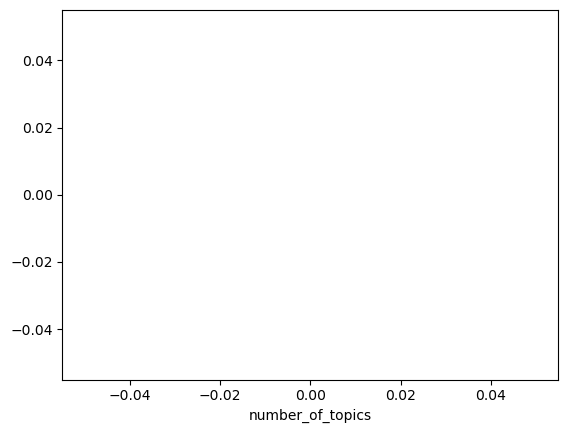

In [77]:

from gensim.models import CoherenceModel

# Compute coherence score
number_of_topics = []
coherence_score = []
for i in range(1,10):
  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           iterations=50,
                                           num_topics=i)

 
  #estimate coherence in each topic 
  coherence_model_lda = CoherenceModel(model=lda_model, 
                                       texts= words, #reviews['Review_Clean_List'], 
                                       dictionary=dictionary, 
                                       coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  number_of_topics.append(i)
  coherence_score.append(coherence_lda)

# Create a dataframe of coherence score by number of topics 
topic_coherence = pd.DataFrame({'number_of_topics':number_of_topics,
                                'coherence_score':coherence_score})

# Print a line plot
sns.lineplot(data=topic_coherence, x='number_of_topics', y='coherence_score')



In [79]:
print(number_of_topics)
print(topic_coherence)

[1, 2, 3, 4, 5, 6, 7, 8, 9]
   number_of_topics  coherence_score
0                 1              NaN
1                 2              NaN
2                 3              NaN
3                 4              NaN
4                 5              NaN
5                 6              NaN
6                 7              NaN
7                 8              NaN
8                 9              NaN


# BERT and embeddings for text

Dimensionality Reduction can be done (e.g. using embeddings) for the text data which we analyze: BERTopic compresses them into a lower-dimensional space.
Yet our data is too small to apply more complex algorithms though.

# Conceptual maps


Generate a Conceptual Map: Use a data visualization library such as Matplotlib to create a conceptual map based on the most common words.
    
    
For this we will need to do sentiment analysis and also tokenize our data.

    

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import networkx as nx
import matplotlib.pyplot as plt

# Text to analyze
text_init = "'Meditation', 'sometimes', 'yes,', 'afternoon', 'not', 'because', 'I', 'was', 'on', 'the', 'evening', 'cooking', 'team', '(unfortunate', 'planning', 'which', "I'd", 'suggest', 'should', 'be', 'avoided', 'in', 'the', 'future).', 'I', 'learned', 'many', 'things,', 'among', 'others', 'e.g.', 'that', 'sharing', 'circles', 'are', 'a', 'powerful', 'format', 'for', 'me', 'to', 'be', 'able', 'to', 'share', 'things,', 'being', 'listened', 'to', 'and', 'truly', 'listen', 'to', 'others.', 'I', 'found', 'it', 'challenging', 'to', 'sense', 'the', 'strong', 'disconnect', 'of', 'the', 'facilitation', 'team', 'from', 'the', 'residents/participants', 'by', 'only', 'being', 'in', 'the', 'facilitation', 'role', 'in', 'the', 'RC', 'as', 'well', 'as', 'not', 'really', 'being', 'part', 'of', 'the', 'residency', 'but', 'rather', 'coming', 'an', 'going', 'in', 'and', 'out', 'of', 'the', 'house.', 'I', 'did', 'morning', 'meditation', 'in', 'the', 'first', 'week.', 'I', 'felt', 'like', 'this', 'helped', 'with', 'grounding', 'and', 'creating', 'a', 'shared', 'sense', 'of', 'rhythm', 'with', 'others.', 'The', 'second', 'week', 'I', "didn't", 'make', 'it', 'to', 'the', 'morning', 'meditation', 'as', 'I', 'was', 'prioritising', 'sleep!', 'ð\x9f\x98\x8a', 'The', 'RCs', 'felt', 'like', 'an', 'unconditionally', 'compassionate', 'space', 'to', 'share', 'experiences', 'and', 'explore', 'relational', 'dynamics', 'in', 'real', 'time.', 'I', 'learnt', 'how', 'powerful', 'that', 'space', 'can', 'be', 'and', 'how', 'it', 'can', 'enable', 'us', 'to', 'tune', 'in', 'and', 'zoom', 'in', 'to', 'the', 'infinitely', 'complex', 'fractal', 'nature', 'of', 'relational', 'experiences.', 'I', "don't", 'feel', 'I', 'experienced', 'any', 'significant', 'challenges.', 'The', 'biggest', 'challenge', 'for', 'me', 'personally', 'was', 'to', 'find', 'the', 'entry', 'points', 'and', 'connections', 'to', 'shift', 'my', 'own', '(and', 'the', "group's)", 'awareness', 'from', 'the', 'conceptual', 'into', 'the', 'embodied', 'and', 'present.', 'Sometimes', 'I', 'struggled', 'even', 'to', 'hold', 'this', 'as', 'an', 'intention', 'and', 'could', 'easily', 'get', 'lost', 'in', 'conceptual', 'conversation.', 'The', 'other', 'participants', 'and', 'the', 'facilitators', 'helped', 'a', 'lot', 'with', 'this', 'process'"#"Python is a popular programming language. It is easy to learn and has a large community of developers. However, sometimes it can be slow and requires a lot of memory to run. Overall, I think Python is a great language."

text = replace(text_init, "'")

# Extract positive and negative words from the text
stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(text)
positive_words = []
negative_words = []

for word in word_tokens:
    if word.lower() not in stop_words:
        if word.lower() in ["great", "good", "excellent", "positive"]:
            positive_words.append(word.lower())
        elif word.lower() in ["slow", "requires", "negative", "bad"]:
            negative_words.append(word.lower())

# Create a graph
G = nx.Graph()

# Add positive words to the graph
for word in positive_words:
    G.add_node(word, sentiment="positive")

# Add negative words to the graph
for word in negative_words:
    G.add_node(word, sentiment="negative")

# Add edges between positive and negative words
for pos_word in positive_words:
    for neg_word in negative_words:
        G.add_edge(pos_word, neg_word)

# Set the layout of the graph
pos = nx.spring_layout(G)

# Draw the nodes and edges of the graph
for node in G.nodes():
    color = "green" if G.nodes[node]["sentiment"] == "positive" else "red"
    nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color=color)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)

# Show the graph
plt.show()
